# Dogs vs Cat Redux

[Dogs vs. Cats Redux: Kernels Edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)
    
    

In [1]:
#import modules
import utils; reload(utils) # TODO: don't know the reason for this statement
from utils import *

#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [2]:
import keras

In [3]:
from vgg16 import Vgg16

# No shuffling

In [4]:
vgg = Vgg16()
model = vgg.model

In [5]:
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)

In [6]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [7]:
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.1),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
______

In [8]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 3,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Epoch 1/3
591s - loss: 8.0658 - acc: 0.4977 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 2/3
589s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 3/3
589s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010


In [ ]:
# ^^ validation accuracy and loss didn't improve at all after first epoch

In [9]:
# lower training rate
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 3,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/3
591s - loss: 8.0653 - acc: 0.4980 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 2/3
589s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 3/3
590s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010


In [ ]:
# validation accuracy didn't improve even now

# shuffling in train batches

In [ ]:
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.1),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 3,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

In [ ]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 4,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

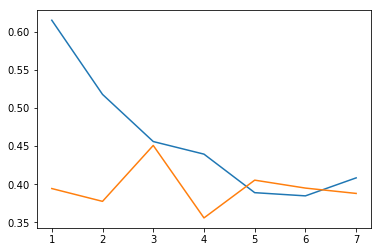

In [10]:
plt.plot(range(1, 8), [0.6149, 0.5177, 0.4559, 0.4394, 0.3889, 0.3847, 0.4083],
        range(1, 8), [0.3943, 0.3775, 0.4508, 0.3558, 0.4053, 0.3949, 0.3879])

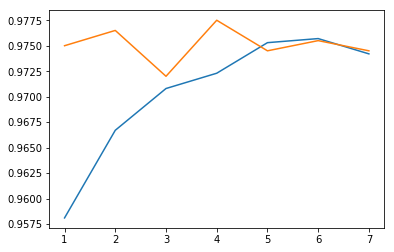

In [11]:
plt.plot(range(1, 8), [0.9581, 0.9667, 0.9708, 0.9723, 0.9753, 0.9757, 0.9742],
        range(1, 8), [0.9750, 0.9765, 0.9720, 0.9775, 0.9745, 0.9755, 0.9745])

In [ ]:
# lower training rate
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 7,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

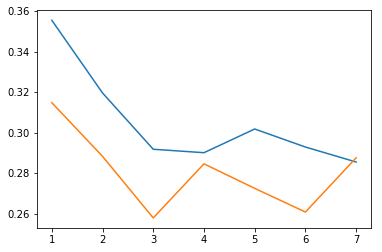

In [12]:
plt.plot(range(1, 8), [0.3555, 0.3196, 0.2918, 0.2901, 0.3018, 0.2929, 0.2855],
        range(1, 8), [0.3148, 0.2883, 0.2579, 0.2846, 0.2725, 0.2608, 0.2876])

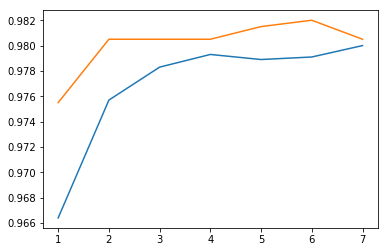

In [13]:
plt.plot(range(1, 8), [0.9664, 0.9757, 0.9783, 0.9793, 0.9789, 0.9791, 0.9800],
        range(1, 8), [0.9755, 0.9805, 0.9805, 0.9805, 0.9815, 0.9820, 0.9805])                                                                  

# shuffling and data augmentation

In [8]:
gen1 = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

gen2 = image.ImageDataGenerator()

train_batches = gen1.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)

valid_batches = gen2.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 5,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--aws-x86_64-with-debian-stretch-sid-x86_64-2.7.13-64/lock_dir/lock


Epoch 1/5
654s - loss: 0.4764 - acc: 0.9584 - val_loss: 0.3979 - val_acc: 0.9690
Epoch 2/5
651s - loss: 0.3873 - acc: 0.9699 - val_loss: 0.2423 - val_acc: 0.9825
Epoch 3/5
651s - loss: 0.3974 - acc: 0.9715 - val_loss: 0.2986 - val_acc: 0.9780
Epoch 4/5
651s - loss: 0.3886 - acc: 0.9722 - val_loss: 0.3329 - val_acc: 0.9770
Epoch 5/5
651s - loss: 0.4077 - acc: 0.9710 - val_loss: 0.2961 - val_acc: 0.9795


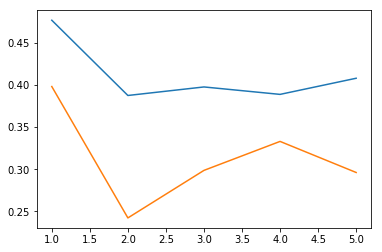

In [10]:
plt.plot(range(1,6), [0.4764, 0.3873, 0.3974, 0.3886, 0.4077],
        range(1,6), [0.3979, 0.2423, 0.2986, 0.3329, 0.2961])

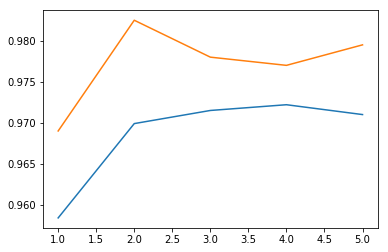

In [11]:
plt.plot(range(1,6), [0.9584,0.9699,0.9715,0.9722,0.9710],
        range(1,6), [0.9690,0.9825,0.9780,0.9770,0.9795])

# shuffling, data augmentation and batch normalization

In [3]:
from vgg16bn import Vgg16BN

In [4]:
vgg16_bn = Vgg16BN()

In [5]:
model = vgg16_bn.model

In [6]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [7]:
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [8]:
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
gen1 = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

gen2 = image.ImageDataGenerator()

train_batches = gen1.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)

valid_batches = gen2.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 5,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/5
653s - loss: 0.5678 - acc: 0.9530 - val_loss: 0.3436 - val_acc: 0.9760
Epoch 2/5
652s - loss: 0.5191 - acc: 0.9624 - val_loss: 0.3507 - val_acc: 0.9765
Epoch 3/5
652s - loss: 0.5253 - acc: 0.9639 - val_loss: 0.3455 - val_acc: 0.9765
Epoch 4/5
653s - loss: 0.5049 - acc: 0.9652 - val_loss: 0.3035 - val_acc: 0.9790
Epoch 5/5
651s - loss: 0.4978 - acc: 0.9665 - val_loss: 0.3518 - val_acc: 0.9770


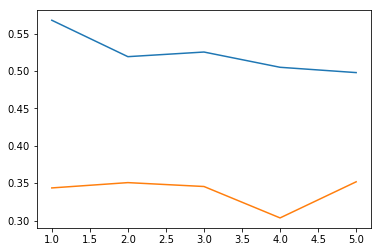

In [11]:
plt.plot(range(1,6), [0.5678, 0.5191, 0.5253, 0.5049, 0.4978],
        range(1,6), [0.3436, 0.3507, 0.3455, 0.3035, 0.3518])

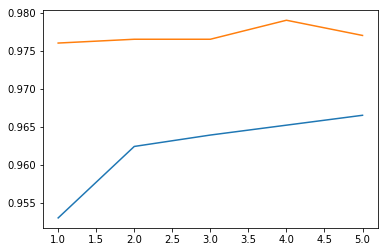

In [12]:
plt.plot(range(1,6), [0.9530, 0.9624, 0.9639, 0.9652, 0.9665],
        range(1,6), [0.9760, 0.9765, 0.9765, 0.9790, 0.9770])

In [3]:
# lower the training rate to 0.005
from vgg16bn import Vgg16BN
vgg16_bn = Vgg16BN()
model = vgg16_bn.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
gen1 = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

gen2 = image.ImageDataGenerator()

train_batches = gen1.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)

valid_batches = gen2.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 5,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/5
652s - loss: 0.4100 - acc: 0.9566 - val_loss: 0.2527 - val_acc: 0.9765
Epoch 2/5
651s - loss: 0.4320 - acc: 0.9630 - val_loss: 0.3190 - val_acc: 0.9750
Epoch 3/5
651s - loss: 0.4533 - acc: 0.9646 - val_loss: 0.3075 - val_acc: 0.9760
Epoch 4/5
651s - loss: 0.4283 - acc: 0.9672 - val_loss: 0.3041 - val_acc: 0.9775
Epoch 5/5
651s - loss: 0.4633 - acc: 0.9655 - val_loss: 0.3006 - val_acc: 0.9780


In [6]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 5,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Epoch 1/5
652s - loss: 0.4294 - acc: 0.9689 - val_loss: 0.2591 - val_acc: 0.9805
Epoch 2/5
651s - loss: 0.4522 - acc: 0.9669 - val_loss: 0.2524 - val_acc: 0.9795
Epoch 3/5
651s - loss: 0.4600 - acc: 0.9670 - val_loss: 0.2790 - val_acc: 0.9805
Epoch 4/5
651s - loss: 0.4455 - acc: 0.9682 - val_loss: 0.3089 - val_acc: 0.9795
Epoch 5/5
651s - loss: 0.4513 - acc: 0.9685 - val_loss: 0.2871 - val_acc: 0.9800


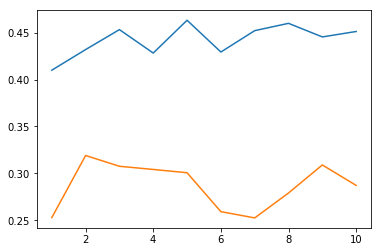

In [8]:
plt.plot(range(1,11), [0.4100, 0.4320, 0.4533, 0.4283, 0.4633, 0.4294, 0.4522, 0.4600, 0.4455, 0.4513],
        range(1,11), [0.2527, 0.3190, 0.3075, 0.3041, 0.3006, 0.2591, 0.2524, 0.2790, 0.3089, 0.2871])

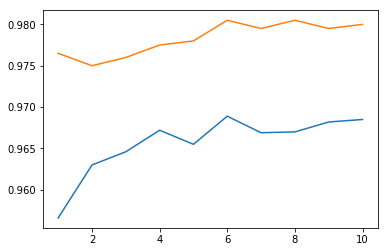

In [9]:
plt.plot(range(1,11), [0.9566, 0.9630, 0.9646, 0.9672, 0.9655, 0.9689, 0.9669, 0.9670, 0.9682, 0.9685],
        range(1,11), [0.9765, 0.9750, 0.9760, 0.9775, 0.9780, 0.9805, 0.9795, 0.9805, 0.9795, 0.9800])

# create predictions

In [4]:
gen1 = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

gen2 = image.ImageDataGenerator()

train_batches = gen1.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)

valid_batches = gen2.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 2,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/2
652s - loss: 0.4236 - acc: 0.9595 - val_loss: 0.2553 - val_acc: 0.9805
Epoch 2/2
651s - loss: 0.3814 - acc: 0.9705 - val_loss: 0.2827 - val_acc: 0.9800


In [5]:
batches, preds = vgg.test('./data/redux/test', batch_size = 128)

Found 12500 images belonging to 1 classes.


In [6]:
preds

array([[  0.0000e+00,   1.0000e+00],
       [  1.0000e+00,   0.0000e+00],
       [  0.0000e+00,   1.0000e+00],
       ..., 
       [  0.0000e+00,   1.0000e+00],
       [  1.2424e-07,   1.0000e+00],
       [  0.0000e+00,   1.0000e+00]], dtype=float32)

In [7]:
filenames = batches.filenames

In [8]:
# Grab the dog prediction column
isdog = preds[:,0]
print "Raw Predictions: " + str(isdog[:5])
print "Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)])

Raw Predictions: [ 0.  1.  0.  1.  1.]
Mid Predictions: [ 0.421   0.5601  0.589   0.5564  0.5393]
Edge Predictions: [ 0.  1.  0. ...,  0.  0.  0.]


In [9]:
isdog = isdog.clip(min=0.05, max=0.95)

In [10]:
# Extract imageIds from the filenames in our test/unknown directory 
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [11]:
# joining the two columns into an array of [imageId, isDog]
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  5.1870e+03,   5.0000e-02],
       [  2.6100e+02,   9.5000e-01],
       [  3.6740e+03,   5.0000e-02],
       [  5.6810e+03,   9.5000e-01],
       [  8.0150e+03,   9.5000e-01]])

In [12]:
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [13]:
from IPython.display import FileLink
FileLink(submission_file_name)

/home/ubuntu/extVol/fastai-courses/deeplearning1/nbs-custom-mine/submission1.csv